0.18.1


C:\Users\tamir\Anaconda3\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>
(960, 1280, 4) float32 <class 'numpy.ndarray'>


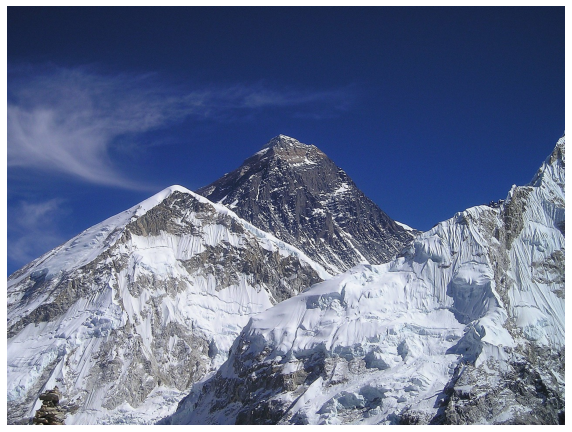

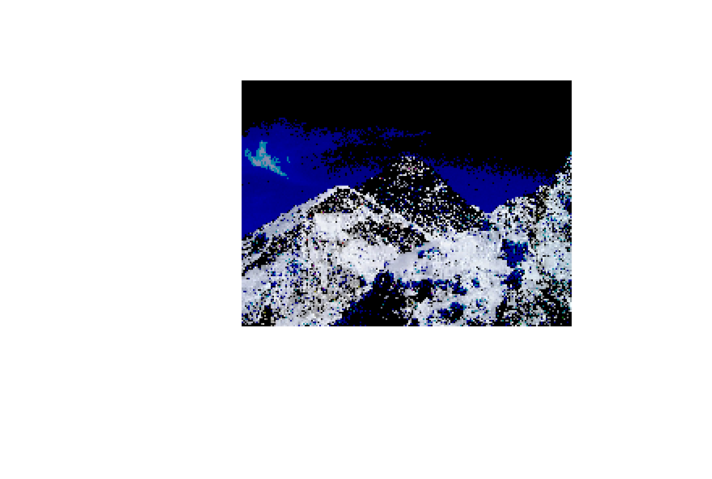

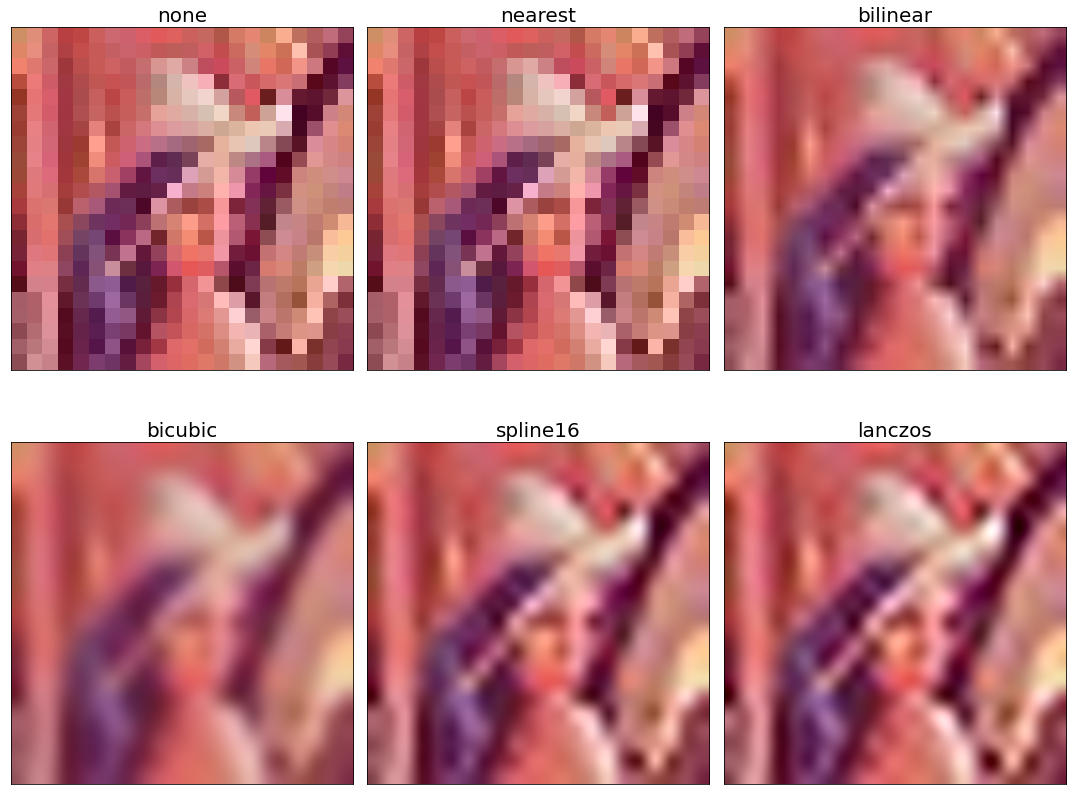

(340, 453, 3) uint8 <class 'numpy.ndarray'>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


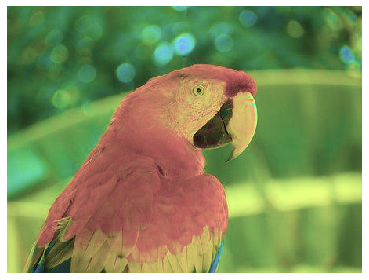

<ipython-input-1-bffb16a33180>:103: FutureWarning: `viewer` is deprecated and will be removed in 0.20. For alternatives, refer to https://scikit-image.org/docs/stable/user_guide/visualization.html
  viewer = viewer.ImageViewer(im)


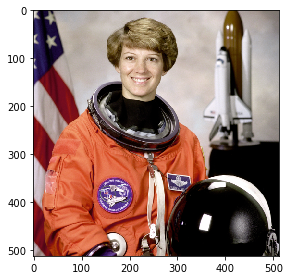

AttributeError: module 'scipy.misc' has no attribute 'imsave'

In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')
import skimage
print(skimage.__version__)
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc


# ### Reading, saving, and displaying an image using PIL




im = Image.open("parrot.png") # read the image, provide the correct path
print(im.width, im.height, im.mode, im.format, type(im))
# 453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>
im.show() # display the image


# In[4]:


im_g = im.convert('L') # convert the RGB color image to a grayscale image
im_g.save('parrot_gray.png') # save the image to disk
Image.open("parrot_gray.png").show() # read the grayscale image from disk and show


# ### Reading, saving, and displaying an image using Matplotlib

# In[5]:


im = mpimg.imread("hill.png") # read the image from disk as a numpy ndarray
print(im.shape, im.dtype, type(im)) # this image contains an α channel, hence num_channels= 4
# (960, 1280, 4) float32 <class 'numpy.ndarray'>
plt.figure(figsize=(10,10))
plt.imshow(im) # display the image
plt.axis('off')
plt.show()


# In[7]:


im1 = im
im1[im1 < 0.5] = 0 # make the image look darker
plt.imshow(im1)
plt.axis('off')
plt.tight_layout()
plt.savefig("ill_dark.png") # save the dark image
plt.close()
im = mpimg.imread("hill_dark.png") # read the dark image
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis('off') # no axis ticks
plt.tight_layout()
plt.show()


# ### Interpolating while displaying with matplotlib imshow

# In[8]:


im = mpimg.imread("lena_small.jpg") # read the image from disk as a numpy ndarray
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()


# ### Reading, saving, and displaying an image using scikit-image

# In[ ]:


im = imread("parrot.png") # read image from disk, provide the correct path
print(im.shape, im.dtype, type(im))
hsv = color.rgb2hsv(im) # from RGB to HSV color space
hsv[:, :, 1] = 0.5 # change the saturation
im1 = color.hsv2rgb(hsv) # from HSV back to RGB
imsave('parrot_hsv.png', im1) # save image to disk
im = imread("parrot_hsv.png")
plt.axis('off'), imshow(im), show()


# In[ ]:


viewer = viewer.ImageViewer(im)
viewer.show()


# ### Using scikit-image's astronaut dataset

# In[ ]:


im = data.astronaut()
imshow(im), show()


# ### Using scipy.misc's face dataset

# In[ ]:


im = misc.face() # load the raccoon's face image
misc.imsave('face.png', im) # uses the Image module (PIL)
plt.imshow(im), plt.axis('off'), plt.show()


# In[ ]:


im = misc.imread('pepper.jpg')
print(type(im), im.shape, im.dtype)
# <class 'numpy.ndarray'> (225, 225, 3) uint8


# In[ ]:


import imageio
im = imageio.imread('pepper.jpg')
print(type(im), im.shape, im.dtype)
plt.imshow(im), plt.axis('off'), plt.show()





im = Image.open("parrot.png")
print(im.mode)
im.save("parrot.jpg")


# In[ ]:


im = Image.open("hill.png")
print(im.mode)
# RGBA
im.convert('RGB').save("hill.jpg") # first convert to RGB mode


# ### Converting from one image mode into another

# In[ ]:


im = imread("parrot.png", as_gray=True)
print(im.shape)
im = imread("Ishihara.png")
im_g = color.rgb2gray(im)
plt.subplot(121), plt.imshow(im, cmap='gray'), plt.axis('off')
plt.subplot(122), plt.imshow(im_g, cmap='gray'), plt.axis('off')
plt.show()


# ### Converting from one color space into another

# In[ ]:


im = imread("parrot.png")
im_hsv = color.rgb2hsv(im)
plt.gray()
plt.figure(figsize=(10,8))
plt.subplot(221), plt.imshow(im_hsv[...,0]), plt.title('h', size=20),
plt.axis('off')
plt.subplot(222), plt.imshow(im_hsv[...,1]), plt.title('s', size=20),
plt.axis('off')
plt.subplot(223), plt.imshow(im_hsv[...,2]), plt.title('v', size=20),
plt.axis('off')
plt.subplot(224), plt.axis('off')
plt.show()


# ### Converting image data structures

# In[ ]:


im = Image.open('flowers.png') # read image into an Image object with PIL
im = np.array(im) # create a numpy ndarray from the Image object
imshow(im) # use skimage imshow to display the image
plt.axis('off'), show()


# In[ ]:


im = imread('flowers.png') # read image into numpy ndarray with skimage
im = Image.fromarray(im) # create a PIL Image object from the numpy ndarray
im.show() # display the image with PIL Image.show() method


# ### Image manipulations with numpy array slicing

# In[ ]:


lena = mpimg.imread("lena.jpg") # read the image from disk as a numpy ndarray
print(lena[0, 40])
# print(lena[10:13, 20:23,0:1]) # slicing
lx, ly, _ = lena.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
lena[mask,:] = 0 # masks
plt.figure(figsize=(10,10))
plt.imshow(lena), plt.axis('off'), plt.show()


# ### Simple image morphing - α-blending of two images using cross-dissolving

# In[ ]:


im1 = mpimg.imread("messi.jpg") / 255 # scale RGB values in [0,1]
im2 = mpimg.imread("ronaldo.jpg") / 255
i = 1
plt.figure(figsize=(18,15))
for alpha in np.linspace(0,1,20):
    plt.subplot(4,5,i)
    plt.imshow((1-alpha)*im1 + alpha*im2)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()


# ### Image manipulations with PIL

# In[ ]:


im = Image.open("parrot.png") # open the image, provide the correct path
print(im.width, im.height, im.mode, im.format) # print image size, mode and format


# ### Cropping an image

# In[ ]:


im_c = im.crop((175,75,320,200)) # crop the rectangle given by (left, top, right, bottom) from the image
im_c.show()


# ### Resizing an image

# In[ ]:


im = Image.open("clock.jpg")
print(im.width, im.height)
im.show()


# In[55]:


im_large = im.resize((im.width*5, im.height*5), Image.BILINEAR) # bi-linear interpolation


# In[ ]:


im = Image.open("victoria_memorial.png")
print(im.width, im.height)
im.show()


# In[ ]:


im_small = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)


# ### Negating an image

# In[ ]:


im = Image.open("../images/parrot.png")
im_t = im.point(lambda x: 255 - x)
im_t.show()


# ### Converting an image into grayscale

# In[ ]:


im_g = im.convert('L') # convert the RGB color image to a grayscale image


# ### Log transformation

# In[ ]:


im_g.point(lambda x: 255*np.log(1+x/255)).show()


# ### Power-law transformation

# In[ ]:


im_g.point(lambda x: 255*(x/255)**0.6).show()


# ### Reflecting an image

# In[ ]:


im.transpose(Image.FLIP_LEFT_RIGHT).show() # reflect about the vertical axis


# ### Rotating an image

# In[63]:


im_45 = im.rotate(45) # rotate the image by 45 degrees
im_45.show() # show the rotated image


# ### Applying an Affine transformation on an image

# In[ ]:


im = Image.open("parrot.png")
im.transform((int(1.4*im.width), im.height), Image.AFFINE,
data=(1,-0.5,0,0,1,0)).show() # shear


# ### Perspective transformation

# In[ ]:


params = [1, 0.1, 0, -0.1, 0.5, 0, -0.005, -0.001]
im1 = im.transform((im.width//3, im.height), Image.PERSPECTIVE, params,
Image.BICUBIC)
im1.show()


# ### Changing pixel values of an image

# In[ ]:


# choose 5000 random locations inside image
im1 = im.copy() # keep the original image, create a copy
n = 5000
x, y = np.random.randint(0, im.width, n), np.random.randint(0, im.height,n)
for (x,y) in zip(x,y):
    im1.putpixel((x, y), ((0,0,0) if np.random.rand() < 0.5 else (255,255,255))) # salt-and-pepper noise
im1.show()


# ### Drawing on an image

# In[ ]:


im = Image.open("parrot.png")
draw = ImageDraw.Draw(im)
draw.ellipse((125, 125, 200, 250), fill=(255,255,255,128))
del draw
im.show()


# ### Drawing text on an image

# In[ ]:


im = Image.open("parrot.png")
draw = ImageDraw.Draw(im)
font = ImageFont.truetype("arial.ttf", 23) # use a truetype font
draw.text((10, 5), "Welcome to image processing with python", font=font)
del draw
im.show()


# ### Creating a thumbnail

# In[ ]:


im = Image.open("../images/parrot.png")
im_thumbnail = im.copy() # need to copy the original image first
im_thumbnail.thumbnail((100,100)) # now paste the thumbnail on the image
im.paste(im_thumbnail, (10,10))
im.save("parrot_thumb.jpg")
im.show()


# ### Computing the basic statistics of an image

# In[ ]:


s = stat.Stat(im)
print(s.extrema) # maximum and minimum pixel values for each channel R, G, B
print(s.count)
print(s.mean)
print(s.median)
print(s.stddev)


# ### Plotting the histograms of pixel values for the RGB channels of an image

# In[ ]:


pl = im.histogram()
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.show()


# ### Separating the RGB channels of an image

# In[ ]:


im = Image.open("parrot.png")
ch_r, ch_g, ch_b = im.split() # split the RGB image into 3 channels: R, G and B
# we shall use matplotlib to display the channels
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() # show the R, G, B channels


# ### Combining multiple channels of an image

# In[ ]:


im = Image.merge('RGB', (ch_b, ch_g, ch_r)) # swap the red and blue channels obtained last time with split()
im.show()


# ### α-blending two images

# In[ ]:


im1 = Image.open("parrot.png")
im2 = Image.open("hill.png")
im1 = im1.convert('RGBA') # two images have different modes, must be converted to the same mode
im2 = im2.resize((im1.width, im1.height), Image.BILINEAR) # two images have different sizes, must be converted to the same size
im = Image.blend(im1, im2, alpha=0.5).show()


# ### Superimposing two images

# In[ ]:


im1 = Image.open("parrot.png")
im2 = Image.open("hill.png").convert('RGB').resize((im1.width, im1.height))
multiply(im1, im2).show()


# ### Adding two images

# In[ ]:


add(im1, im2).show()


# ### Computing the difference between two images

# In[ ]:


from PIL.ImageChops import subtract, multiply, screen, difference, add
im1 = Image.open("goal1.png") # load two consecutive frame images from the video
im2 = Image.open("goal2.png")
im = difference(im1, im2)
plt.figure(figsize=(20,25))
im.save("goal_diff.png")
plt.subplot(311)
plt.imshow(im1)
plt.axis('off')
plt.subplot(312)
plt.imshow(im2)
plt.axis('off')
plt.subplot(313)
plt.imshow(im), plt.axis('off')
plt.show()


# ### Inverse warping and geometric transformation using the warp() function

# In[ ]:


im = imread("parrot.png")
tform = SimilarityTransform(scale=0.9,
rotation=np.pi/4,translation=(im.shape[0]/2, -100))
warped = warp(im, tform)
import matplotlib.pyplot as plt
plt.imshow(warped), plt.axis('off'), plt.show()


# ### Applying the swirl transform

# In[ ]:


im = imread("../images/parrot.png")
swirled = swirl(im, rotation=0, strength=15, radius=200)
plt.imshow(swirled)
plt.axis('off')
plt.show()


# ### Adding random Gaussian noise to images

# In[ ]:


im = img_as_float(imread("parrot.png"))
plt.figure(figsize=(15,12))
sigmas = [0.1, 0.25, 0.5, 1]
for i in range(4):
    noisy = random_noise(im, var=sigmas[i]**2)
    plt.subplot(2,2,i+1)
    plt.imshow(noisy)
    plt.axis('off')
plt.title('Gaussian noise with sigma=' + str(sigmas[i]), size=20)
plt.tight_layout()
plt.show()


# ### Drawing contour lines for an image

# In[ ]:


from skimage.color import rgb2gray
im = rgb2gray(imread("einstein.jpg")) # read the image from disk as a numpy ndarray
plt.figure(figsize=(20,8))
plt.subplot(131), plt.imshow(im, cmap='gray'), plt.title('Original Image', size=20)
plt.subplot(132), plt.contour(np.flipud(im), colors='k',
levels=np.logspace(-15, 15, 100))
plt.title('Image Contour Lines', size=20)
plt.subplot(133), plt.title('Image Filled Contour', size=20),
plt.contourf(np.flipud(im), cmap='inferno')
plt.show()







